In [45]:
import pandas as pd
import numpy as np

In [46]:
#mandatory conditions for linear regression
#1. Target variable should always be numeric and continous
#2. No of rows should always be greater than number of columns

In [47]:
lcn = pd.read_csv(r"C:\Users\rhuta\Downloads\LungCapData.csv")

In [48]:
lcn

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no
...,...,...,...,...,...,...
720,5.725,9,56.0,no,female,no
721,9.050,18,72.0,yes,male,yes
722,3.850,11,60.5,yes,female,no
723,9.825,15,64.9,no,female,no


In [49]:
#requirement is to build a predictive model which can predict the lung capacity

In [50]:
#3 step - Data cleaning

In [51]:
lcn.shape

(725, 6)

In [52]:
lcn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LungCap    725 non-null    float64
 1   Age        725 non-null    int64  
 2   Height     725 non-null    float64
 3   Smoke      725 non-null    object 
 4   Gender     725 non-null    object 
 5   Caesarean  725 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 34.1+ KB


In [53]:
lcn.isnull().sum()

LungCap      0
Age          0
Height       0
Smoke        0
Gender       0
Caesarean    0
dtype: int64

In [54]:
lcn.describe()

,LungCap,Age,Height
count,725.000000,725.000000,725.000000
mean,7.863148,12.326897,64.836276
std,2.662008,4.004750,7.202144
min,0.507000,3.000000,45.300000
25%,6.150000,9.000000,59.900000
50%,8.000000,13.000000,65.400000
75%,9.800000,15.000000,70.300000
max,14.675000,19.000000,81.800000


In [55]:
lcn.Gender.value_counts()

male      367
female    358
Name: Gender, dtype: int64

In [56]:
lcn.Gender = lcn.Gender.replace({'male' : 1, 'female' : 0})

In [57]:
lcn

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,1,no
1,10.125,18,74.7,yes,0,no
2,9.550,16,69.7,no,0,yes
3,11.125,14,71.0,no,1,no
4,4.800,5,56.9,no,1,no
...,...,...,...,...,...,...
720,5.725,9,56.0,no,0,no
721,9.050,18,72.0,yes,1,yes
722,3.850,11,60.5,yes,0,no
723,9.825,15,64.9,no,0,no


In [58]:
lcn.Caesarean.value_counts()

no     561
yes    164
Name: Caesarean, dtype: int64

In [59]:
lcn.Smoke = lcn.Smoke.replace({'no' : 0 , 'yes' : 1})
lcn

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,0,1,no
1,10.125,18,74.7,1,0,no
2,9.550,16,69.7,0,0,yes
3,11.125,14,71.0,0,1,no
4,4.800,5,56.9,0,1,no
...,...,...,...,...,...,...
720,5.725,9,56.0,0,0,no
721,9.050,18,72.0,1,1,yes
722,3.850,11,60.5,1,0,no
723,9.825,15,64.9,0,0,no


In [60]:
lcn.Caesarean.replace({'no' : 0 , 'yes':1}, inplace=True)

In [61]:
lcn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LungCap    725 non-null    float64
 1   Age        725 non-null    int64  
 2   Height     725 non-null    float64
 3   Smoke      725 non-null    int64  
 4   Gender     725 non-null    int64  
 5   Caesarean  725 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 34.1 KB


In [62]:
#Step 4 - Sampling
from sklearn.model_selection import train_test_split

In [63]:
lcn_train, lcn_test = train_test_split(lcn, test_size = 0.2)

In [64]:
lcn_train.shape

(580, 6)

In [65]:
lcn_train_x = lcn_train.iloc[: , 1::]
lcn_train_y = lcn_train.iloc[: , 0]
lcn_test_x = lcn_test.iloc[: , 1::]
lcn_test_y = lcn_test.iloc[: , 0]
lcn_test_x
lcn_test_y

674     7.475
325    11.075
386     5.150
445     6.150
121     6.450
        ...  
689     4.700
266     8.975
536     7.925
588     9.475
463     9.600
Name: LungCap, Length: 145, dtype: float64

In [66]:
#step 5 - BUilding the model
#import the necessary function from sklearn
#create an object of that function
#Run the fit function and then model is created

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
linereg = LinearRegression()

In [69]:
linereg.fit(lcn_train_x , lcn_train_y)

LinearRegression()

In [70]:
pred_train = linereg.predict(lcn_train_x)
pred_test = linereg.predict(lcn_test_x)

In [71]:
pred_train.shape

(580,)

In [72]:
error_test = lcn_test_y - pred_test

In [73]:
error_test

674   -0.462044
325    0.711411
386   -1.368003
445    1.750589
121    0.129886
         ...   
689    0.218141
266   -1.393358
536   -0.923410
588   -0.036147
463    1.148149
Name: LungCap, Length: 145, dtype: float64

In [74]:
#step 6 Evaluate the model
Rsquare = linereg.score(lcn_train_x, lcn_train_y)
Rsquare

0.8535387338364238

In [75]:
#No of rows
N = lcn_train_x.shape[0]

In [76]:
#No of columns
K = lcn_train_x.shape[1]

In [77]:
adj_Rsquare = 1-(1-Rsquare) * (N-1)/(N-K-1)
adj_Rsquare #No diff so we have not used insignificant columns also adjRsquare will not be greater than Rsquare

0.8522629388349989

In [78]:
#mse, range 0 to infinite
mse = np.mean(np.square(error_test))
mse

1.0472135579125703

In [79]:
#RSME
rsme = np.sqrt(mse)
rsme

1.023334528838234

In [80]:
#MAPE lower the mape better is the modelaccuracy 100 - 13 = 87%
mape =  np.mean(np.abs(error_test * 100 / lcn_test_y))
mape

13.26272616756014

In [81]:
err_train = lcn_train_y - pred_train
err_train

481   -0.111311
665    0.169726
204   -0.729389
360   -0.988438
352   -0.837463
         ...   
421   -0.829168
160    0.513362
165   -0.879531
139    0.529165
34    -0.225392
Name: LungCap, Length: 580, dtype: float64

In [82]:
#Errors are normally distributed or not?

In [83]:
import matplotlib.pyplot as plt

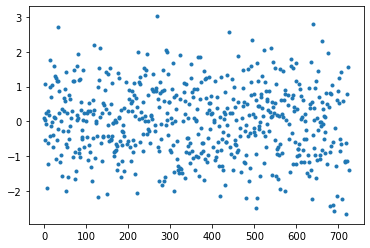

In [84]:
plt.plot(err_train, '.')

(array([ 5.,  7.,  9., 18., 24., 45., 50., 60., 39., 69., 60., 56., 42.,
        39., 27., 13., 10.,  3.,  2.,  2.]),
 array([-2.65374158, -2.36997294, -2.0862043 , -1.80243566, -1.51866703,
        -1.23489839, -0.95112975, -0.66736111, -0.38359248, -0.09982384,
         0.1839448 ,  0.46771344,  0.75148208,  1.03525071,  1.31901935,
         1.60278799,  1.88655663,  2.17032526,  2.4540939 ,  2.73786254,
         3.02163118]),
 <BarContainer object of 20 artists>)

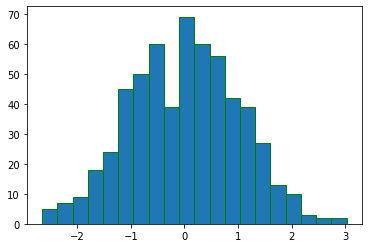

In [85]:
plt.hist(err_train , bins = 20, edgecolor = 'g')

In [88]:
new_data = pd.DataFrame()

In [89]:
new_data['Actual'] = lcn_train_y
new_data['Predicted'] = pred_train

In [90]:
new_data

,Actual,Predicted
481,10.375,10.486311
665,7.825,7.655274
204,3.900,4.629389
360,3.975,4.963438
352,10.600,11.437463
...,...,...
421,11.225,12.054168
160,9.725,9.211638
165,4.425,5.304531
139,9.475,8.945835


In [91]:
import seaborn as sns

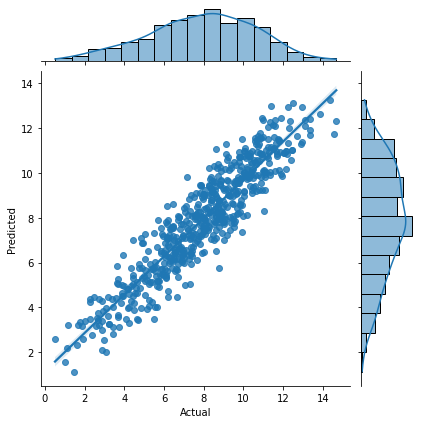

In [92]:
sns.jointplot(x = 'Actual', y = 'Predicted', data = new_data, kind = 'reg')